In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('hessi_flare_list.txt', on_bad_lines='skip', skiprows=[0,1,2,3,4,5,6], skipfooter=40, sep='\s+', header=None, usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12])#, usecols=['Peak','Dur'])
dur = data[5][8229:31598].astype('float64')
energy = data[7][8229:31598].astype('float64')
peak = data[6][8229:31598].astype('float64')

logpeak = np.log10(peak)
logenergy = np.log10(energy)

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sabr\AppData\Local\Temp\ipykernel_26428\459337228.py:5: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('hessi_flare_list.txt', on_bad_lines='skip', skiprows=[0,1,2,3,4,5,6], skipfooter=40, sep='\s+', header=None, usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12])#, usecols=['Peak','Dur'])
C:\Users\sabr\AppData\Local\Temp\ipykernel_26428\459337228.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('hessi_flare_list.txt', on_bad_lines='skip', skiprows=[0,1,2,3,4,5,6], skipfooter=40, sep='\s+', header=None, usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12])#, usecols=['Peak','Dur'])


In [2]:
energyarray = np.array([logenergy])
durarray = np.array([dur])

In [3]:
OldRange = np.max(logpeak) - np.min(logpeak)  
NewRange = 5.4471580313422 - 0
flareclass = (((logpeak - np.min(logpeak)) * NewRange) / OldRange) + 0
flareclass[(flareclass<1.0)] = 0.0
flareclass[(flareclass>=1.0) & (flareclass<2.0)] = 1.0
flareclass[(flareclass>=2.0) & (flareclass<3.0)] = 2.0
flareclass[(flareclass>=3.0) & (flareclass<4.0)] = 3.0
flareclass[(flareclass>=4.0)] = 4.0

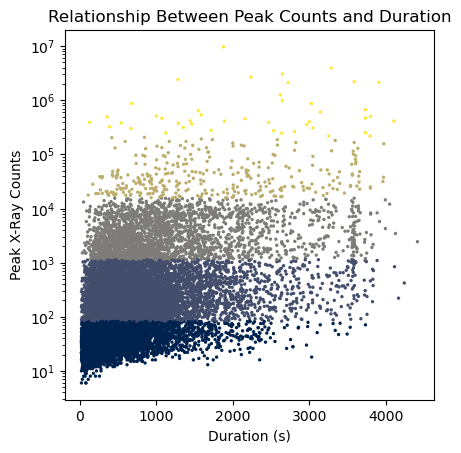

In [4]:
plt.scatter(dur,peak,c=flareclass,cmap='cividis',s=2)
plt.gca().set_box_aspect(1)
plt.yscale('log')
plt.xlabel('Duration (s)')
plt.ylabel('Peak X-Ray Counts')
plt.title('Relationship Between Peak Counts and Duration')
plt.show()

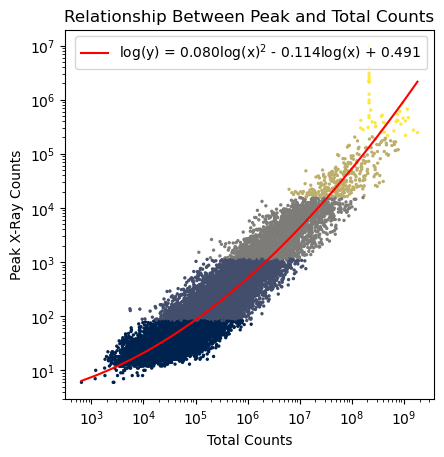

In [5]:
coef = np.polyfit(logenergy, logpeak, 2)

fit = 10**((coef[0]*(np.log10(energy))**2)+(coef[1]*np.log10(energy))+coef[2])

xfit = np.sort(energy)
yfit = np.sort(fit)

plt.scatter(energy,peak,c=flareclass,cmap='cividis',s=2)
plt.plot(xfit,yfit,c='red',label='log(y) = 0.080log(x)$^{2}$ - 0.114log(x) + 0.491')
plt.gca().set_box_aspect(1)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Total Counts')
plt.ylabel('Peak X-Ray Counts')
plt.title('Relationship Between Peak and Total Counts')
plt.show()

C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there 

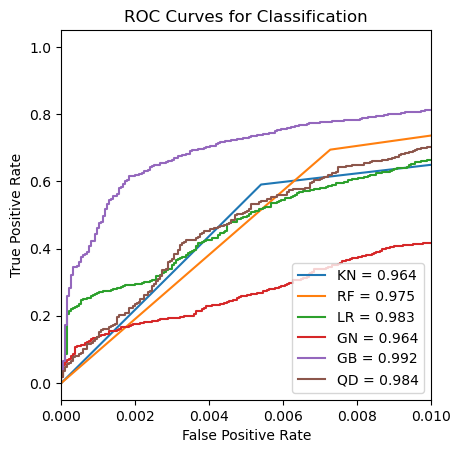

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from astroML.classification import GMMBayes
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

y = np.array([flareclass])[0]
X = np.column_stack([energyarray[0],durarray[0]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
n_classes = 5
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

n_range = np.arange(1, 100)
cv_scores = []
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"],
         label=f"KN = {roc_auc["micro"]:0.3f}")

classifier = RandomForestClassifier(n_estimators=7)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"],
         label=f"RF = {roc_auc["micro"]:0.3f}")

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"],
         label=f"LR = {roc_auc["micro"]:0.3f}")

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"],
         label=f"GN = {roc_auc["micro"]:0.3f}")

classifier = GMMBayes(n_components=5)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"GB = {roc_auc:0.3f}")

classifier = QDA()
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"],
         label=f"QD = {roc_auc["micro"]:0.3f}")

plt.xlim(0, 0.01)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification')
plt.legend(loc="lower right")
plt.gca().set_box_aspect(1)
plt.show()

In [7]:
y = np.array([flareclass])[0]
X = np.column_stack([energyarray[0],durarray[0]])
print(y)

[0. 0. 0. ... 0. 1. 1.]


C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sabr\anaconda3\envs\astr3300\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


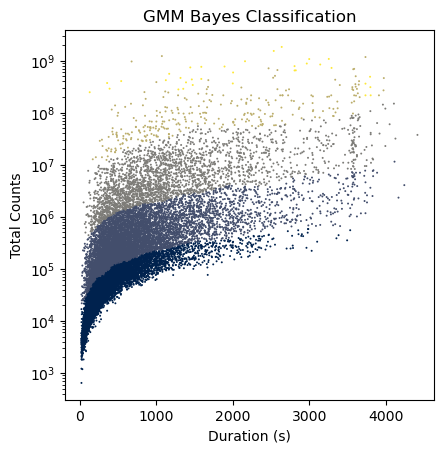

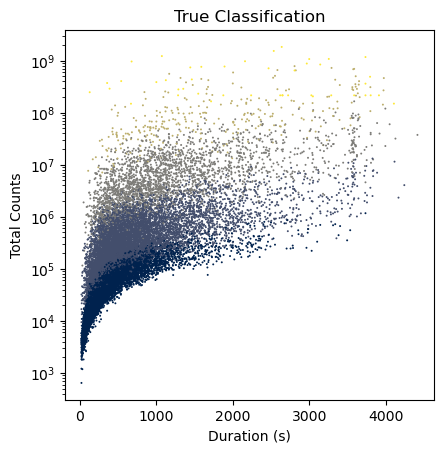

In [8]:
clf = GMMBayes(n_components=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X)
plt.scatter(dur, energy, c=y_pred, cmap='cividis', edgecolor="None", s=2)
plt.yscale('log')
plt.xlabel('Duration (s)')
plt.ylabel('Total Counts')
plt.title('GMM Bayes Classification')
plt.gca().set_box_aspect(1)
plt.show()

plt.scatter(dur, energy, c=flareclass, cmap='cividis', edgecolor="None", s=2)
plt.yscale('log')
plt.xlabel('Duration (s)')
plt.ylabel('Total Counts')
plt.title('True Classification')
plt.gca().set_box_aspect(1)
plt.show()